## Using Sequential API


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
    

### Import Dataset

In [3]:
from sklearn.datasets import fetch_california_housing


In [4]:
housing=fetch_california_housing()

In [5]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [6]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [8]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Training Dataset

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [11]:
X_train_full.shape

(15480, 8)

### Data Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
scaler= StandardScaler()
X_train =scaler.fit_transform(X_train)
X_valid=scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [14]:
# to get random values from the dataset

np.random.seed(42)
tf.random.set_seed(42)

In [15]:
X_train.shape

(11610, 8)

### Model Layers

In [16]:
model= keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


### Model Compilation

In [18]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['mae'])

c:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [19]:
model_history=model.fit(X_train,y_train,epochs=20,
                       validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7414 - val_mae: 0.6560
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6221 - val_mae: 0.5870
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5779 - val_mae: 0.5550
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5572 - val_mae: 0.5496
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.5305 - val_mae: 0.5319
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.5113 - val_mae: 0.5224
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4974 - val_mae: 0.5151
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [20]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3993 - mae: 0.4595


In [21]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271905064582825,
  0.5032975673675537,
  0.48535555601119995,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549983620643616,
  0.41116511821746826,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.39796027541160583],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618005990982056,
  0.5398454070091248,
  0.5237293839454651,
  0.5112563967704773,
  0.5010153651237488,
  0.492448091506958,
  0.4857262969017029,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740883588790894,
  0.46360209584236145,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.4545365273952484,
  0.4521064758300781,
  0.45083147287368774],
 'val_loss': [0.7413728833198547,
  0.6220595836639404,
  0.5779173374176025,
  0.55718696117

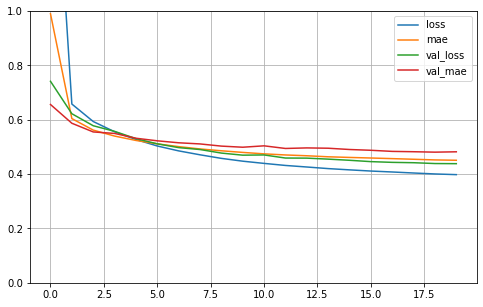

In [22]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
X_new=X_test[:3]

In [24]:
y_pred=model.predict(X_new)
print(y_pred)

1/1 [==============================] - 0s 236ms/step
[[0.48965693]
 [1.9347274 ]
 [3.6413553 ]]


In [25]:
print(y_test[:3])

[0.477   0.458   5.00001]


## Using Functional API

In [26]:
del model  # deleting Previous Model

In [27]:
keras.backend.clear_session()

### Creating Layers

In [29]:
input_ =keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation='relu')(input_)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.concatenate([input_,hidden2])
output=keras.layers.Dense(1)(concat)

In [30]:
model= keras.models.Model(inputs=[input_],outputs=[output])


In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']            

### Compiling Model

In [33]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['mae'])

c:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [34]:
model_history=model.fit(X_train,y_train,epochs=20,
                       validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.8871 - mae: 0.9733 - val_loss: 0.8137 - val_mae: 0.6729
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6985 - mae: 0.6181 - val_loss: 0.6738 - val_mae: 0.6108
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6362 - mae: 0.5826 - val_loss: 0.6294 - val_mae: 0.5800
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5831 - mae: 0.5567 - val_loss: 0.5917 - val_mae: 0.5669
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5507 - mae: 0.5389 - val_loss: 0.5662 - val_mae: 0.5514
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5220 - mae: 0.5247 - val_loss: 0.5377 - val_mae: 0.5381
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5009 - mae: 0.5131 - val_loss: 0.5219 - val_mae: 0.5318
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [35]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3998 - mae: 0.4638


In [36]:
model_history.history

{'loss': [1.8870816230773926,
  0.6985266208648682,
  0.6362205147743225,
  0.5830869078636169,
  0.5506728887557983,
  0.5219724178314209,
  0.5008842349052429,
  0.48285889625549316,
  0.4675367474555969,
  0.45575714111328125,
  0.44570794701576233,
  0.4373014569282532,
  0.43016543984413147,
  0.4241107106208801,
  0.41865482926368713,
  0.41403132677078247,
  0.4096393287181854,
  0.4063640534877777,
  0.4016761779785156,
  0.398674875497818],
 'mae': [0.9733277559280396,
  0.6180993914604187,
  0.5825698971748352,
  0.5567156672477722,
  0.5389419794082642,
  0.524651288986206,
  0.5130792260169983,
  0.503461480140686,
  0.49505457282066345,
  0.48919859528541565,
  0.4823799431324005,
  0.47803330421447754,
  0.47424691915512085,
  0.47002115845680237,
  0.4670860469341278,
  0.46421629190444946,
  0.4613955020904541,
  0.45853710174560547,
  0.4556283950805664,
  0.4535866677761078],
 'val_loss': [0.8137031197547913,
  0.673773467540741,
  0.6293588280677795,
  0.591749370098

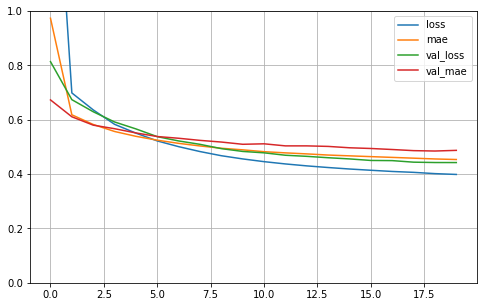

In [37]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()